In [1]:
import os
import wave
import time
import pickle
import pyaudio
import warnings
import numpy as np
from sklearn import preprocessing
import joblib
from scipy.io.wavfile import read
import librosa
from tqdm import tqdm
from librosa.feature import mfcc
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")

In [10]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 512
RECORD_SECONDS = 10
audio = pyaudio.PyAudio()
info = audio.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (audio.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", audio.get_device_info_by_host_api_device_index(0, i).get('name'))
print("-------------------------------------------------------------")
index = int(input())		
print("recording via index "+str(index))
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,input_device_index = index,
                frames_per_buffer=CHUNK)
Recordframes = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    Recordframes.append(data)
print ("recording stopped")
stream.stop_stream()
stream.close()
audio.terminate()
OUTPUT_FILENAME="current_input1.wav"
waveFile = wave.open(OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(Recordframes))
waveFile.close()

Input Device id  0  -  Built-in Microphone
-------------------------------------------------------------
recording via index 0
recording stopped


In [2]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained('pyannote/speaker-diarization')


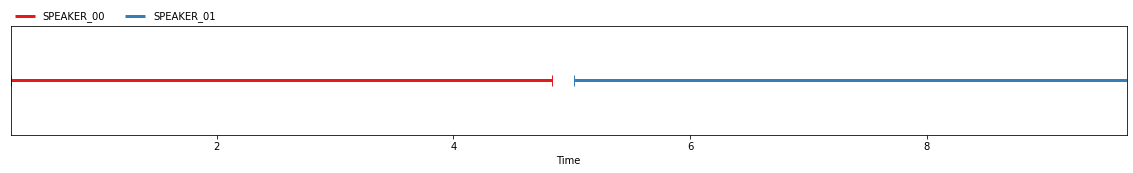

In [11]:
diarization = pipeline("current_input1.wav")
diarization

In [12]:
for turn, _, speaker in diarization.itertracks(yield_label=True,):
  print(turn.start,turn.end,speaker)

0.2578125000000001 4.830937499999999 SPEAKER_00
5.016562499999999 9.6909375 SPEAKER_01


In [3]:
import librosa , librosa.display
Signal , sr = librosa.load("current_input1.wav", offset=0) 

In [5]:
librosa.get_duration(Signal,sr)>4.5

True